# Quantum Galton Board (QGB) in Qiskit

This notebook contains:

1. **3-Peg Version** — fixed-size circuit for demonstration.
2. **n-Peg Version** — scalable QGB generator for any number of pegs.

Both versions use Qiskit's `aer_simulator` to run and Matplotlib to display frequency distributions.


In [ ]:
# Install required packages (if running in a fresh environment)
# !pip install qiskit qiskit-aer matplotlib --quiet


In [6]:
!pip install qiskit qiskit[visualization] qiskit-aer qiskit-ibm-runtime requests==2.32.3

In [7]:
!pip install qiskit-aer

## 3-Peg Quantum Galton Board

I.0 : The ball is placed in qubit 2

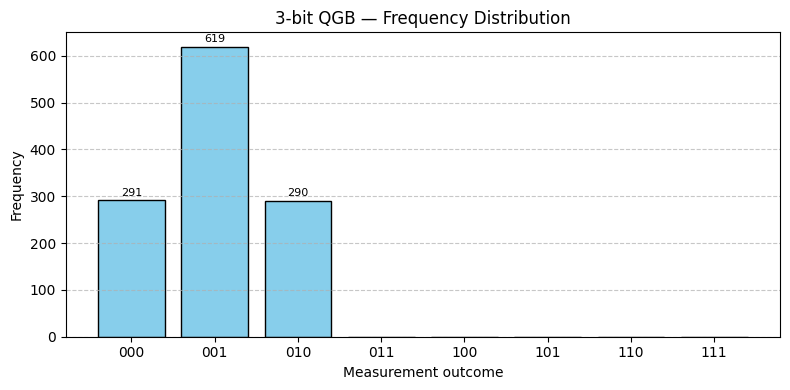

{0: 291, 1: 619, 2: 290, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}

In [8]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import CSwapGate
from qiskit_aer import Aer
import matplotlib.pyplot as plt

def build_qgb_3peg():
    n_qubits = 6
    qc = QuantumCircuit(n_qubits, 3)
    qc.x(2)
    qc.h(0)
    qc.append(CSwapGate(), [0, 1, 2])
    qc.cx(2, 0)
    qc.append(CSwapGate(), [0, 2, 3])
    qc.reset(0)
    qc.h(0)
    qc.append(CSwapGate(), [0, 3, 4])
    qc.cx(4, 0)
    qc.append(CSwapGate(), [0, 4, 5])
    qc.measure(1, 0)
    qc.measure(3, 1)
    qc.measure(5, 2)
    return qc

def simulate_and_plot(qc, shots=1200):
    backend = Aer.get_backend('aer_simulator')
    transpiled = transpile(qc, backend)
    result = backend.run(transpiled, shots=shots).result()
    counts = result.get_counts()
    n = qc.num_clbits
    bin_counts = {i: 0 for i in range(2**n)}
    for bitstring, c in counts.items():
        idx = int(bitstring, 2)
        bin_counts[idx] += c
    labels = [format(i, f'0{n}b') for i in range(2**n)]
    values = [bin_counts[i] for i in range(2**n)]
    plt.figure(figsize=(8, 4))
    bars = plt.bar(labels, values, color='skyblue', edgecolor='black')
    plt.xlabel('Measurement outcome')
    plt.ylabel('Frequency')
    plt.title(f'{n}-bit QGB — Frequency Distribution')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(bar.get_x() + bar.get_width()/2, h + shots*0.005,
                     f'{h}', ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.show()
    return bin_counts

# Run the 3-peg example
qc3 = build_qgb_3peg()
simulate_and_plot(qc3)


1.2: The ball is placed in qubit 3

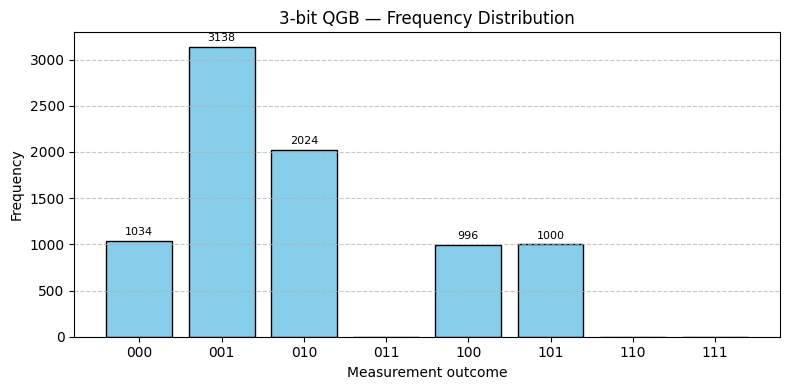

{0: 1034, 1: 3138, 2: 2024, 3: 0, 4: 996, 5: 1000, 6: 0, 7: 0}

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import CSwapGate

def build_qgb_3peg():
    """
    Symmetric 3-peg Quantum Galton Board using 6 qubits:
    - Qubits 1, 3, 5 are 'bins' for measurement
    - Qubits 0, 2, 4 are intermediate coin/control qubits
    - Start in center (qubit 3)
    """
    n_qubits = 6
    qc = QuantumCircuit(n_qubits, 3)

    # Start ball at center (qubit 3)
    qc.x(3)

    # First row: coin flip on qubit 0, swap between center and left/right
    qc.h(0)
    qc.append(CSwapGate(), [0, 3, 1])  # center ↔ left
    qc.append(CSwapGate(), [0, 3, 5])  # center ↔ right

    # Second row for left branch: coin flip on qubit 2
    qc.h(2)
    qc.append(CSwapGate(), [2, 1, 0])  # left ↔ far-left
    qc.append(CSwapGate(), [2, 1, 3])  # left ↔ mid

    # Second row for right branch: coin flip on qubit 4
    qc.h(4)
    qc.append(CSwapGate(), [4, 5, 3])  # right ↔ mid
    qc.append(CSwapGate(), [4, 5, 0])  # right ↔ far-right

    # Measure bins (qubits 1, 3, 5)
    qc.measure(1, 0)
    qc.measure(3, 1)
    qc.measure(5, 2)

    return qc

def simulate_and_plot(qc, shots=8192):
    backend = Aer.get_backend('aer_simulator')
    transpiled = transpile(qc, backend)
    result = backend.run(transpiled, shots=shots).result()
    counts = result.get_counts()
    n = qc.num_clbits
    bin_counts = {i: 0 for i in range(2**n)}
    for bitstring, c in counts.items():
        idx = int(bitstring, 2)
        bin_counts[idx] += c
    labels = [format(i, f'0{n}b') for i in range(2**n)]
    values = [bin_counts[i] for i in range(2**n)]
    plt.figure(figsize=(8, 4))
    bars = plt.bar(labels, values, color='skyblue', edgecolor='black')
    plt.xlabel('Measurement outcome')
    plt.ylabel('Frequency')
    plt.title(f'{n}-bit QGB — Frequency Distribution')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(bar.get_x() + bar.get_width()/2, h + shots*0.005,
                     f'{h}', ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.show()
    return bin_counts

# Run the 3-peg example
qc3 = build_qgb_3peg()
simulate_and_plot(qc3)


1.3: The ball is placed 3 with a baised gate rx

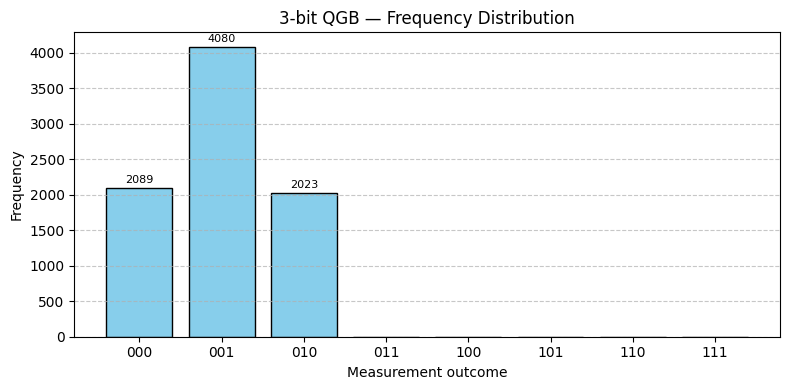

{0: 2089, 1: 4080, 2: 2023, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}

In [11]:


def build_qgb_3peg_symmetric():
    n_qubits = 6
    qc = QuantumCircuit(n_qubits, 3)

    # Initial setup
    qc.x(2)
    qc.rx(0)

    # Outward branch
    qc.append(CSwapGate(), [0, 1, 2])
    qc.cx(2, 0)
    qc.append(CSwapGate(), [0, 2, 3])

    # Midpoint reset
    qc.reset(0)
    qc.rx(0)

    # Mirror back inward (reverse order of outward)
    qc.append(CSwapGate(), [0, 3, 4])
    qc.cx(4, 0)
    qc.append(CSwapGate(), [0, 4, 5])

    # Measurement
    qc.measure(1, 0)
    qc.measure(3, 1)
    qc.measure(5, 2)

    return qc
def simulate_and_plot(qc, shots=8192):
    backend = Aer.get_backend('aer_simulator')
    transpiled = transpile(qc, backend)
    result = backend.run(transpiled, shots=shots).result()
    counts = result.get_counts()
    n = qc.num_clbits
    bin_counts = {i: 0 for i in range(2**n)}
    for bitstring, c in counts.items():
        idx = int(bitstring, 2)
        bin_counts[idx] += c
    labels = [format(i, f'0{n}b') for i in range(2**n)]
    values = [bin_counts[i] for i in range(2**n)]
    plt.figure(figsize=(8, 4))
    bars = plt.bar(labels, values, color='skyblue', edgecolor='black')
    plt.xlabel('Measurement outcome')
    plt.ylabel('Frequency')
    plt.title(f'{n}-bit QGB — Frequency Distribution')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(bar.get_x() + bar.get_width()/2, h + shots*0.005,
                     f'{h}', ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.show()
    return bin_counts

# Run the 3-peg example
qc3 = build_qgb_3peg()
simulate_and_plot(qc3)


## n-Peg Quantum Galton Board

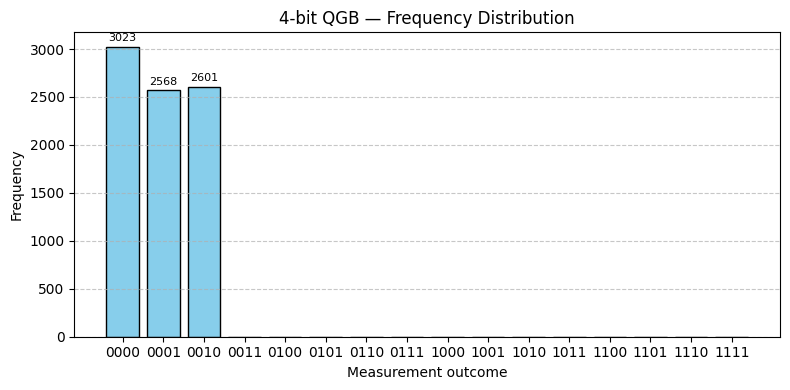

{0: 3023,
 1: 2568,
 2: 2601,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0}

In [ ]:
from math import ceil

def build_qgb_npeg(n_pegs):
    """
    Build an n-peg Quantum Galton Board circuit.
    n_pegs: number of pegs (levels)
    """
    n_qubits = n_pegs * 2
    qc = QuantumCircuit(n_qubits, n_pegs)

    # Place ball in roughly the center of first row
    center_qubit = ceil(n_pegs / 2)
    qc.x(center_qubit)

    control = 0
    for peg in range(n_pegs):
        qc.h(control)
        left = control + 1
        qc.append(CSwapGate(), [control, left, left + 1])
        qc.cx(left + 1, control)
        right = left + 1
        qc.append(CSwapGate(), [control, right, right + 1])
        if peg < n_pegs - 1:
            qc.reset(control)

    # Measure alternating qubits to classical bits
    for i in range(1, n_pegs * 2, 2):
        if i // 2 < n_pegs:
            qc.measure(i, i // 2)

    return qc

# Example: Run for n=4 pegs
qc_n = build_qgb_npeg(4)
simulate_and_plot(qc_n)
